<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Data Pipeline Eurosat</h1>

<h2>Imports<h2>

In [15]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn.model_selection import train_test_split
import random
import requests
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import zipfile

**Gebruik een <i>environment variable</i> voor het instellen van het logleven van TensorFlow**

In [16]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

<h2>Data Collection</h2>

<h3>Data downloaden</h3>

In [17]:
riverDirectory = '../data/River'
edgeFiles = list()
 
for filename in os.listdir(riverDirectory):
    imgFile = os.path.join(riverDirectory, filename)
    edgeFiles.append(imgFile)

In [18]:
highwayDirectory = '../data/Highway'
 
for filename in os.listdir(highwayDirectory):
    imgFile = os.path.join(highwayDirectory, filename)
    edgeFiles.append(imgFile)

<h3>Data filteren</h3>

In [19]:
edgeFiles = [img for img in edgeFiles if ".jpg" in img]
print(edgeFiles[0])

../data/River/River_1456.jpg


<h3>Data inlezen</h3>

In [20]:
imageObjects = np.zeros([len(edgeFiles), 64, 64, 3])
# print(imageObjects)

i = 0

for pic in edgeFiles:
    imageObjects[i] = np.asarray(Image.open(pic)).astype('uint8')/255
    i += 1
    
# print(imageObjects[0])    

**Gebruik de bestandsnamen voor het verkrijgen van de labels**

In [21]:
imageLabels = np.empty(len(edgeFiles), dtype = 'S20')

i = 0

for label in edgeFiles:
    edgeFiles[i] = label.split('/')[2]
    i += 1
    

labelNames, labelNumbers = np.unique(edgeFiles, return_inverse=True)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))
print(labelNames)
# print(labelNumbers)

np.array(np.unique(labelNumbers, return_counts=True)).T

['Highway' 'River']


array([[   0, 2500],
       [   1, 2500]])

In [22]:
# change them to integers in alphabetical order
labelNames, labelNumbers = np.unique(edgeFiles, return_inverse=True)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))
# print(labelNames)
print("labelNumbers", labelNumbers)
print("LabelNumbers Length", len(labelNumbers))


print("imageObjects", len(imageObjects))

np.array(np.unique(labelNumbers, return_counts=True)).T

labelNumbers [1 1 1 ... 0 0 0]
LabelNumbers Length 5000
imageObjects 5000


array([[   0, 2500],
       [   1, 2500]])

<h3>Data splitten</h3>

In [23]:
trainSet, testSet, trainLabels, testLabels = train_test_split(imageObjects, labelNumbers, stratify = labelNumbers, train_size = 0.75, random_state=42)
print(trainSet.shape)
nrOfImages = len(trainSet)

print (len(trainSet), len(testSet),len(trainLabels), len(testLabels))

(3750, 64, 64, 3)
3750 1250 3750 1250


<h3>Data inspecteren</h3>

In [24]:
def inspectData():
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        number = i
        plt.imshow(trainSet[number])
        plt.xlabel(labelNames[trainLabels[number]]) 
    
    plt.show()

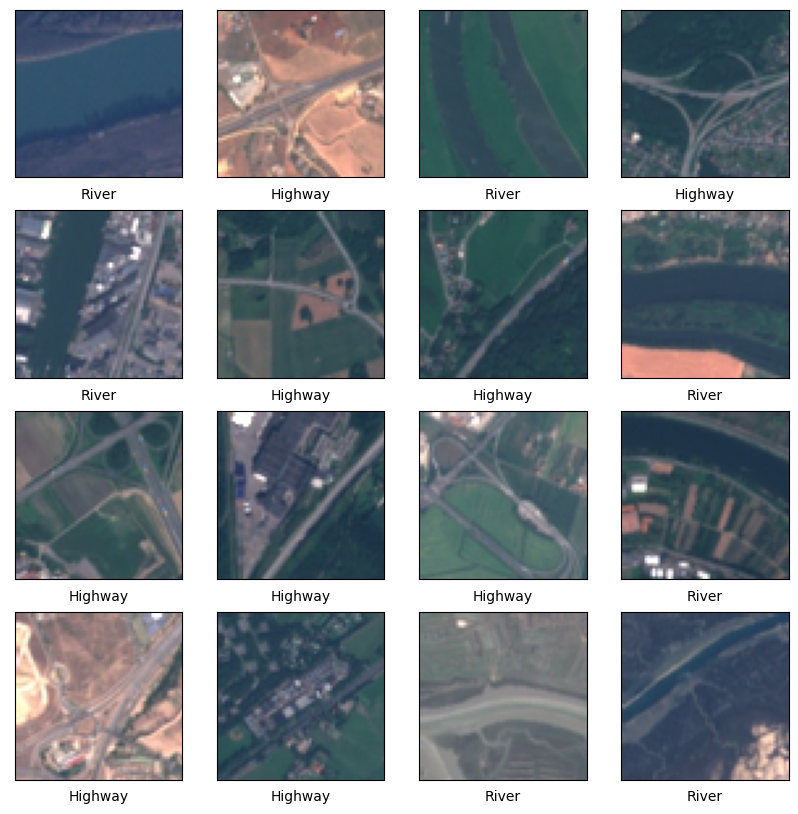

In [25]:
inspectData()    

<h2>Maak een model</h2>

<h3>Definieer de netwerktopologie</h3>

<h3>Exercise 1</h3>
<p>
    Vul de netwerktopologie tot een bruikbaar Neural Netwerk onstaat.
</p>

In [26]:
model =  keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

<h3>Definieer de trainparameters</h3>

In [27]:
lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
nrOfEpochs = 5

<h3>Train het model</h3>

In [28]:
print(len(imageObjects))
print(len(trainLabels))
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
history = model.fit(trainSet, trainLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)


5000
3750
Epoch 1/5


2022-11-18 15:43:00.447595: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


59/59 - 3s - loss: 0.7501 - accuracy: 0.5488 - 3s/epoch - 59ms/step
Epoch 2/5
59/59 - 3s - loss: 0.5614 - accuracy: 0.7189 - 3s/epoch - 52ms/step
Epoch 3/5
59/59 - 3s - loss: 0.5318 - accuracy: 0.7416 - 3s/epoch - 52ms/step
Epoch 4/5
59/59 - 3s - loss: 0.5134 - accuracy: 0.7579 - 3s/epoch - 53ms/step
Epoch 5/5
59/59 - 3s - loss: 0.4939 - accuracy: 0.7656 - 3s/epoch - 52ms/step


<h3>Test het model</h3>

<h3>Exercise 2</h3>
<p>
    Test het Neural Netwerk met de testset en laat zien of het in staat is de juiste class te vinden.
</p>

In [29]:
history_test = model.fit(testSet, testLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)


Epoch 1/5
20/20 - 1s - loss: 0.4691 - accuracy: 0.7816 - 1s/epoch - 52ms/step
Epoch 2/5
20/20 - 1s - loss: 0.4328 - accuracy: 0.7952 - 1s/epoch - 55ms/step
Epoch 3/5
20/20 - 1s - loss: 0.4459 - accuracy: 0.7896 - 1s/epoch - 58ms/step
Epoch 4/5
20/20 - 1s - loss: 0.4392 - accuracy: 0.7864 - 1s/epoch - 51ms/step
Epoch 5/5
20/20 - 1s - loss: 0.4408 - accuracy: 0.7984 - 1s/epoch - 51ms/step


40/40 - 0s - loss: 0.4830 - accuracy: 0.7792 - 381ms/epoch - 10ms/step


array([[  3.4451885,   6.7885017,  -4.563555 ,  -7.4733977,  -6.720448 ,
         -5.9927526,  -4.7526827,  -4.4863634,  -5.1971855,  -4.880948 ],
       [ 12.21041  ,   7.287543 ,  -5.907089 ,  -9.2563715,  -9.6000595,
         -9.3492   ,  -7.1392326,  -6.598283 ,  -5.956854 ,  -9.9073925],
       [  3.6244342,   4.8410897,  -3.4812593,  -5.447251 ,  -5.0469756,
         -4.6026483,  -3.578482 ,  -3.4226778,  -3.7620304,  -4.180228 ],
       [  7.8907204,   5.136339 ,  -4.111539 ,  -6.6478376,  -6.565582 ,
         -6.0405564,  -4.6993823,  -4.4997983,  -4.057686 ,  -6.6935163],
       [ 10.411503 ,   8.518386 ,  -6.332591 , -10.155172 ,  -9.706957 ,
         -9.056484 ,  -7.072664 ,  -6.6635647,  -6.3983126,  -9.174758 ],
       [  8.322366 ,   5.225178 ,  -4.118292 ,  -6.550272 ,  -6.5916276,
         -6.2204833,  -4.7842946,  -4.467835 ,  -4.0473037,  -6.7485566],
       [  6.949715 ,   5.1323934,  -3.9952152,  -6.437523 ,  -6.194885 ,
         -5.651214 ,  -4.4006243,  -4.1863704

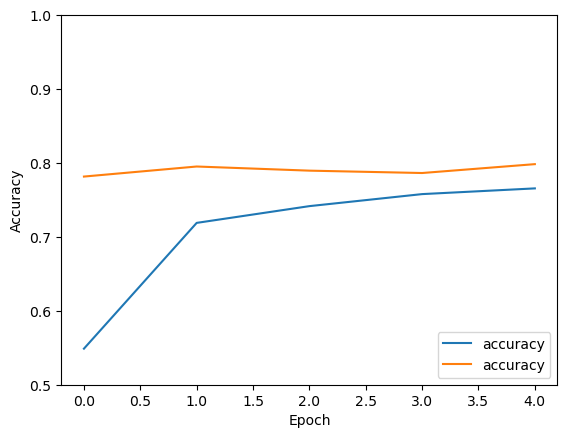

In [30]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history_test.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testSet,  testLabels, verbose=2)

example_batch = trainSet[:10]
example_result = model.predict(example_batch)
example_result




In [32]:
model.save('../models/model_amad')


INFO:tensorflow:Assets written to: ../models/model_amad/assets
